In [1]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
%matplotlib inline

In [2]:
DATASET_DIR = '../kaggle-dataset'
train_df = pd.read_csv(os.path.join(DATASET_DIR, 'train.csv'))
train_df = train_df.drop(['Unnamed: 0'], axis=1)

neg_df = train_df.loc[train_df['Class']==0]
pos_df = train_df.loc[train_df['Class']==1]

In [3]:
print(train_df.shape)

(256818, 31)


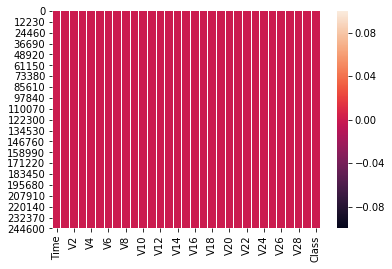

In [153]:
sns.heatmap(train_df.isnull())

In [154]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256818 entries, 0 to 256817
Data columns (total 31 columns):
Time      256818 non-null float64
V1        256818 non-null float64
V2        256818 non-null float64
V3        256818 non-null float64
V4        256818 non-null float64
V5        256818 non-null float64
V6        256818 non-null float64
V7        256818 non-null float64
V8        256818 non-null float64
V9        256818 non-null float64
V10       256818 non-null float64
V11       256818 non-null float64
V12       256818 non-null float64
V13       256818 non-null float64
V14       256818 non-null float64
V15       256818 non-null float64
V16       256818 non-null float64
V17       256818 non-null float64
V18       256818 non-null float64
V19       256818 non-null float64
V20       256818 non-null float64
V21       256818 non-null float64
V22       256818 non-null float64
V23       256818 non-null float64
V24       256818 non-null float64
V25       256818 non-null float64
V26  

In [155]:
print(train_df.describe())

                Time             V1             V2             V3  \
count  256818.000000  256818.000000  256818.000000  256818.000000   
mean    87209.152941      -0.027306      -0.017934       0.078733   
std     43710.283714       1.958919       1.664602       1.509397   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     51075.000000      -0.931600      -0.609322      -0.756624   
50%     78699.000000       0.004976       0.059733       0.273872   
75%    129777.750000       1.276037       0.783669       1.086048   
max    170348.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  256818.000000  256818.000000  256818.000000  256818.000000   
mean        0.018974      -0.031005       0.014631      -0.013405   
std         1.416288       1.372970       1.325974       1.225849   
min        -5.683171     -42.147898     -26.160506     -43.557242   
25%        -0.840985      -0.7214

In [4]:
train_df_copy = train_df.copy()
train_df_copy.drop_duplicates(subset=None, inplace=True)
print(train_df_copy.shape)

(255867, 31)


In [5]:
train_df = train_df_copy

In [6]:
# pos_df.head()
spearman_corr = train_df.corr(method='spearman')
pearson_corr = train_df.corr(method='pearson')

##### Spearman correlation interpretation

.00-.19 “very weak”

.20-.39 “weak”

.40-.59 “moderate”

.60-.79 “strong”

.80-1.0 “very strong

In [159]:
# Strong correlation
pos_corr_pairs = []
neg_corr_pairs = []

for col in spearman_corr:
    for row, value in spearman_corr[col].iteritems():
        if row!=col and value>=0.6:
            pos_corr_pairs.append((col,row))
        if row!=col and value<=-0.6:
            neg_corr_pairs.append((col,row))
            

print(pos_corr_pairs)
print(neg_corr_pairs)

[('V21', 'V22'), ('V22', 'V21')]
[]


In [160]:
# Moderate correlation.
pos_corr_pairs = []
neg_corr_pairs = []

for col in spearman_corr:
    for row, value in spearman_corr[col].iteritems():
        if row!=col and 0.4<=value<0.6:
            pos_corr_pairs.append((col,row))
        if row!=col and -0.4>=value>-0.6:
            neg_corr_pairs.append((col,row))
            

print(pos_corr_pairs)
print(neg_corr_pairs)

[('V2', 'V7'), ('V5', 'V7'), ('V6', 'V8'), ('V7', 'V2'), ('V7', 'V5'), ('V8', 'V6'), ('V27', 'V28'), ('V28', 'V27')]
[('Time', 'V3'), ('V1', 'V3'), ('V2', 'Amount'), ('V3', 'Time'), ('V3', 'V1'), ('V23', 'V25'), ('V25', 'V23'), ('Amount', 'V2')]


/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


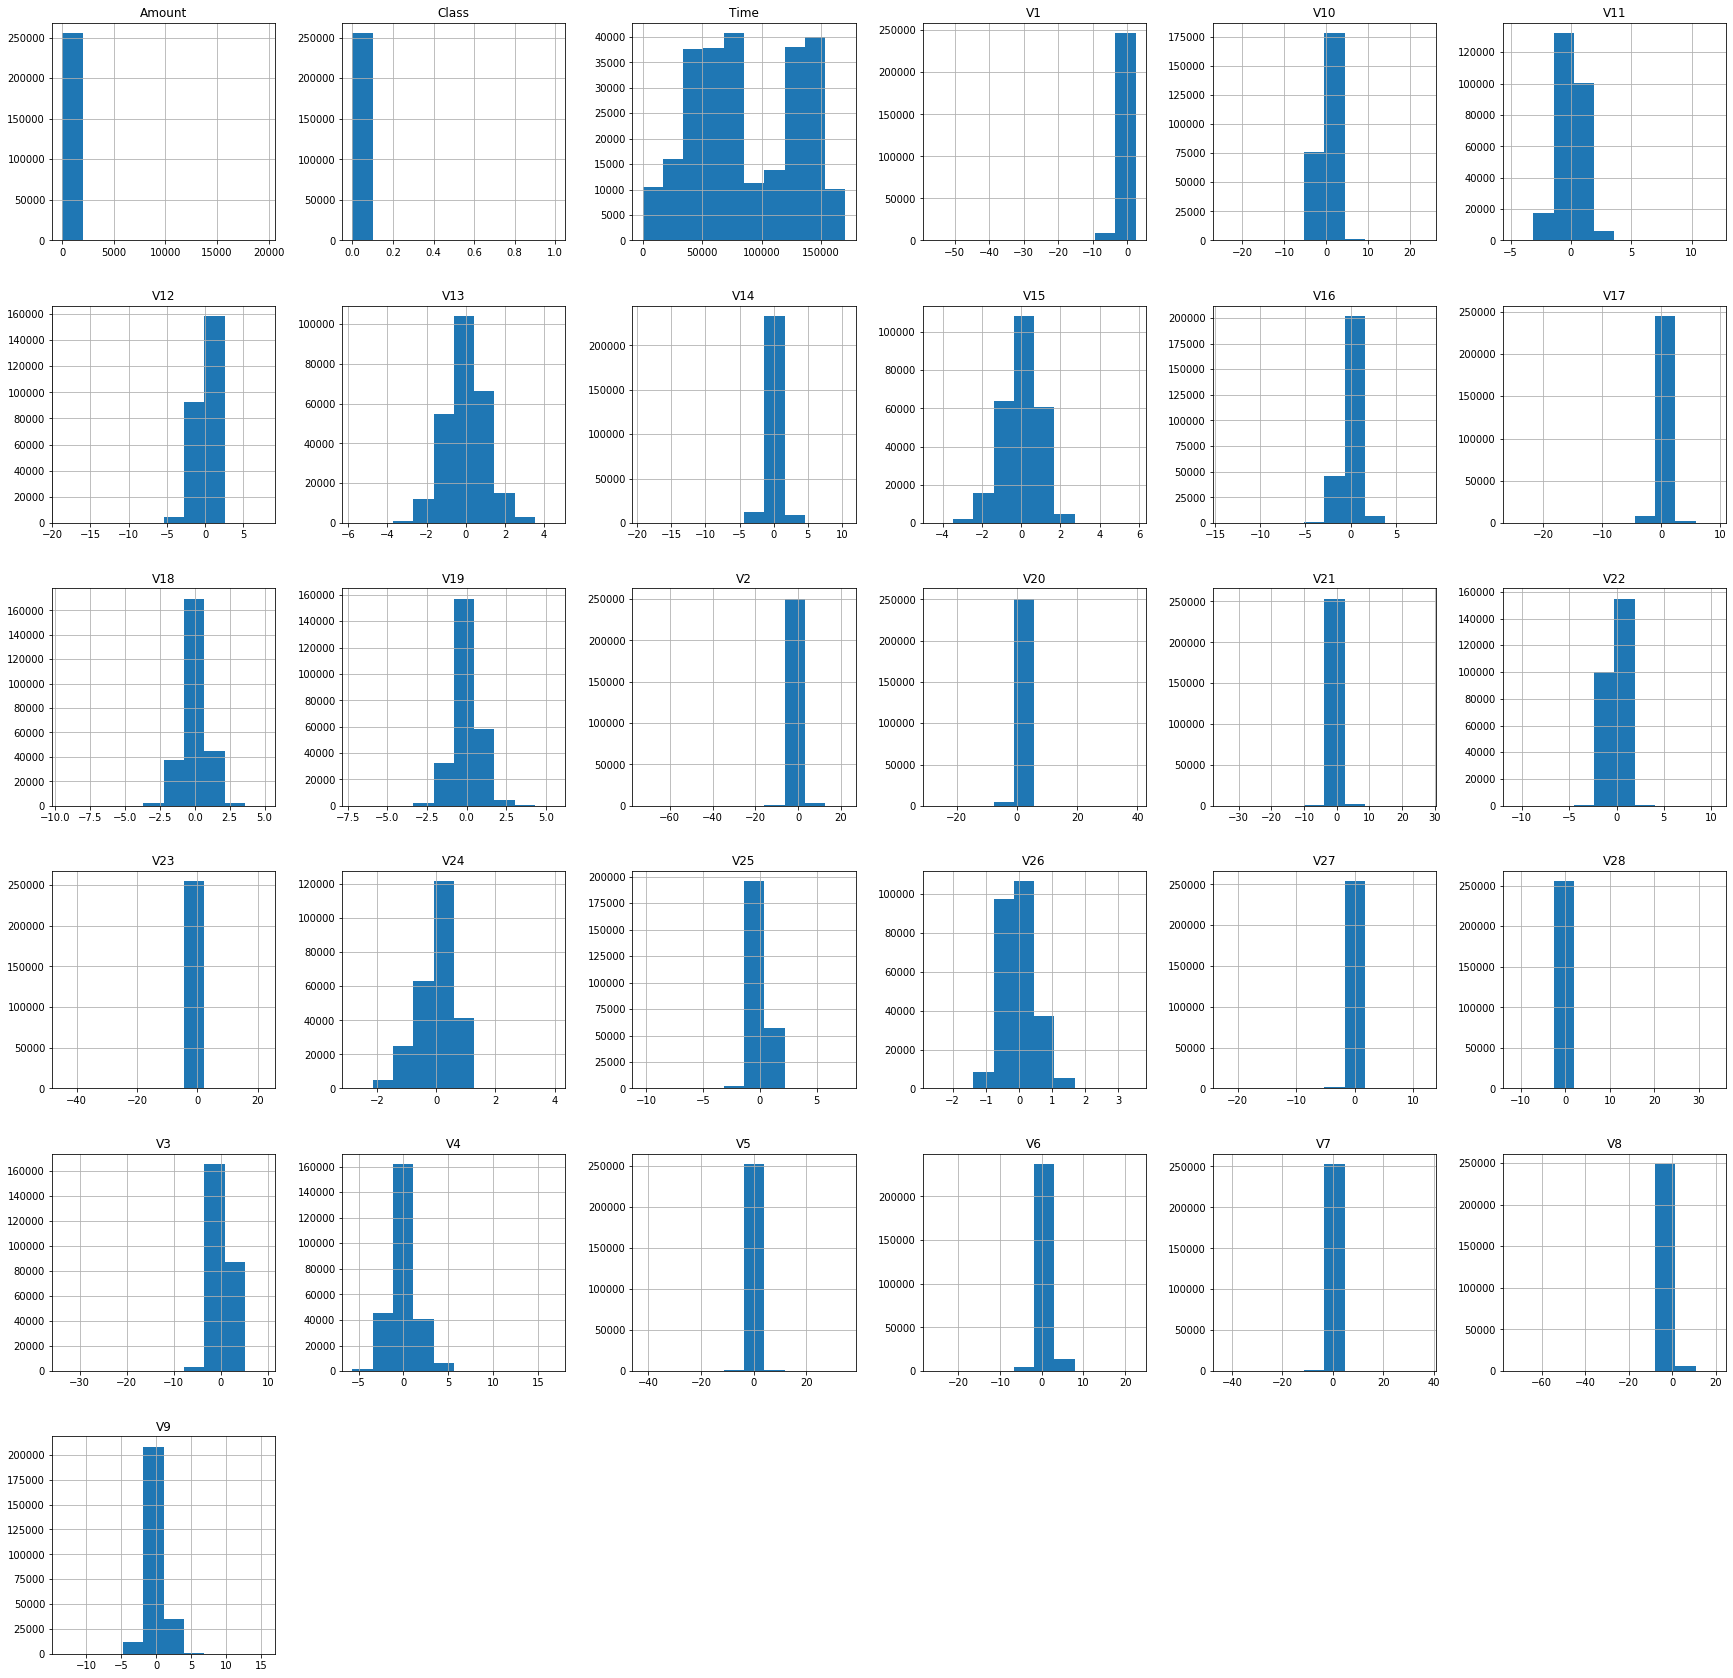

In [161]:
fig = plt.figure(figsize = (30,30))
ax = fig.gca()
hist = train_df.hist(ax=ax)
plt.show()

In [190]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Class',axis=1), 
                                                    train_df['Class'], test_size=0.10, 
                                                    random_state=2309)
print(len(X_train))
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

230280
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25553
           1       0.66      0.68      0.67        34

    accuracy                           1.00     25587
   macro avg       0.83      0.84      0.83     25587
weighted avg       1.00      1.00      1.00     25587



/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


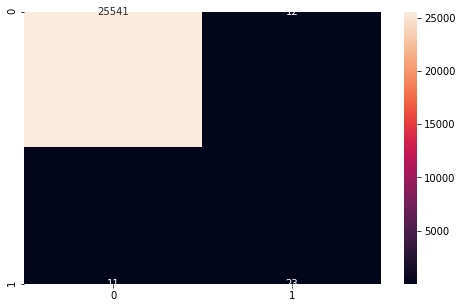

In [221]:
from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(y_test,predictions)
conf_matrix_df=pd.DataFrame(data=conf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d');

In [192]:
TN=conf_matrix[0,0]
TP=conf_matrix[1,1]
FN=conf_matrix[1,0]
FP=conf_matrix[0,1]

precision = TP/float(TP+FP)
recall=TP/float(TP+FN)
TNR=TN/float(TN+FP)
f1_score = 2*precision*recall/(precision+recall)

print("precision", precision)
print('recall', recall)
print('F1 score', f1_score)

precision 0.6571428571428571
recall 0.6764705882352942
F1 score 0.6666666666666666


In [165]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =          ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                     ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =          ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =          ',TN/float(TN+FP),'\n',

'Precision (PPV) = TP/(TP+FP) =                            ',TP/float(TP+FP),'\n',

'Precision for negative class (NPV) = TN/(TN+FN) =         ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',recall/(1-TNR),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-recall)/TNR)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =           0.999101106030406 
 The Missclassification = 1-Accuracy =                      0.0008988939695939724 
 Sensitivity or True Positive Rate = TP/(TP+FN) =           0.6764705882352942 
 Specificity or True Negative Rate = TN/(TN+FP) =           0.9995303878213908 
 Precision (PPV) = TP/(TP+FP) =                             0.6571428571428571 
 Precision for negative class (NPV) = TN/(TN+FN) =          0.9995695053224797 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1440.48774509796 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.3236814164998837


In [10]:
train_df_balanced = pd.concat([neg_df[:len(pos_df)], pos_df], ignore_index=True)

print(train_df_balanced.shape)

(984, 31)


In [274]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = \
                                            train_test_split(train_df_balanced.drop('Class',axis=1), 
                                            train_df_balanced['Class'], 
                                            test_size=0.10, 
#                                                     solver='saga',
                                            random_state=2309)
# print(len(X_train_balanced))

from sklearn import preprocessing
X_without_time = X_train_balanced.drop('Time',axis=1).values
scaler = preprocessing.StandardScaler().fit(X_without_time)
X_without_time = scaler.transform(X_without_time)
X_time_only = np.expand_dims(X_train_balanced['Time'].values, axis=1)

# print(np.expand_dims(X_train_balanced['Time'].values, axis=1).shape)
# print(X_without_time.shape)

X_train_scaled = np.concatenate([X_time_only,X_without_time],axis=1)

# print(X_train_scaled.shape)
# X_train_scaled = X_train_balanced
# print(X_train_scaled)

logmodel_balanced = LogisticRegression()
logmodel_balanced.fit(X_train_scaled,y_train_balanced)

predictions_balanced = logmodel_balanced.predict(X_test_balanced)


from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,predictions_balanced))



              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.93      1.00      0.96        41

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99



/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


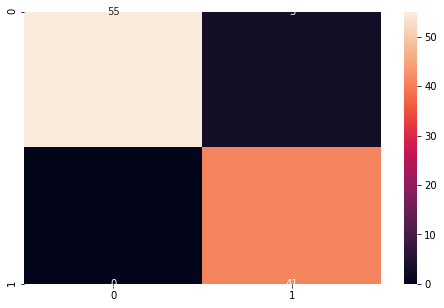

In [275]:
from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(y_test_balanced,predictions_balanced)
conf_matrix_df=pd.DataFrame(data=conf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d');

In [276]:
TN=conf_matrix[0,0]
TP=conf_matrix[1,1]
FN=conf_matrix[1,0]
FP=conf_matrix[0,1]

precision = TP/float(TP+FP)
recall=TP/float(TP+FN)
TNR=TN/float(TN+FP)
f1_score = 2*precision*recall/(precision+recall)

print("precision", precision)
print('recall', recall)
print('F1 score', f1_score)

precision 0.9318181818181818
recall 1.0
F1 score 0.9647058823529412


In [277]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =          ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                     ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =          ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =          ',TN/float(TN+FP),'\n',

'Precision (PPV) = TP/(TP+FP) =                            ',TP/float(TP+FP),'\n',

'Precision for negative class (NPV) = TN/(TN+FN) =         ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',recall/(1-TNR),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-recall)/TNR)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =           0.9696969696969697 
 The Missclassification = 1-Accuracy =                      0.030303030303030276 
 Sensitivity or True Positive Rate = TP/(TP+FN) =           1.0 
 Specificity or True Negative Rate = TN/(TN+FP) =           0.9482758620689655 
 Precision (PPV) = TP/(TP+FP) =                             0.9318181818181818 
 Precision for negative class (NPV) = TN/(TN+FN) =          1.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  19.333333333333336 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.0


In [278]:
y_pred_prob_positive=logmodel_balanced.predict_proba(X_test_balanced)
# print(y_pred_prob_positive)
# print(sum(y_pred_prob_positive[0]))

In [279]:
from sklearn.preprocessing import binarize
for i in range(0,11):
    cm2=0
    y_pred_prob_yes=logmodel_balanced.predict_proba(X_test_balanced)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test_balanced,y_pred2)
    print ('Threshold =',i/10,'\nConfusion Matrix: ','\n',cm2,'\n',
            cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'False Negatives','\n\n',
          'Sensitivity (TPR): ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity (TNR): ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

Threshold = 0.0 
Confusion Matrix:  
 [[ 0 58]
 [ 0 41]] 
 41 correct predictions and 0 False Negatives 

 Sensitivity (TPR):  1.0 Specificity (TNR):  0.0 



Threshold = 0.1 
Confusion Matrix:  
 [[49  9]
 [ 0 41]] 
 90 correct predictions and 0 False Negatives 

 Sensitivity (TPR):  1.0 Specificity (TNR):  0.8448275862068966 



Threshold = 0.2 
Confusion Matrix:  
 [[51  7]
 [ 0 41]] 
 92 correct predictions and 0 False Negatives 

 Sensitivity (TPR):  1.0 Specificity (TNR):  0.8793103448275862 



Threshold = 0.3 
Confusion Matrix:  
 [[52  6]
 [ 0 41]] 
 93 correct predictions and 0 False Negatives 

 Sensitivity (TPR):  1.0 Specificity (TNR):  0.896551724137931 



Threshold = 0.4 
Confusion Matrix:  
 [[53  5]
 [ 0 41]] 
 94 correct predictions and 0 False Negatives 

 Sensitivity (TPR):  1.0 Specificity (TNR):  0.9137931034482759 



Threshold = 0.5 
Confusion Matrix:  
 [[55  3]
 [ 0 41]] 
 96 correct predictions and 0 False Negatives 

 Sensitivity (TPR):  1.0 Specificity (TN

/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/madhuaithal/anaconda3/lib/python3.7/site-pack

In [223]:
# from sklearn.metrics import roc_curve
# print(set(y_test_balanced))
# fpr, tpr, thresholds = roc_curve(y_test_balanced, y_pred_prob_positive[:,1])
# print(fpr)
# print(tpr)
# print(thresholds)
# plt.plot(fpr,tpr)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.title('ROC curve for Fraud classifier')
# plt.xlabel('False positive rate (1-Specificity)')
# plt.ylabel('True positive rate (Sensitivity)')
# plt.grid(True)

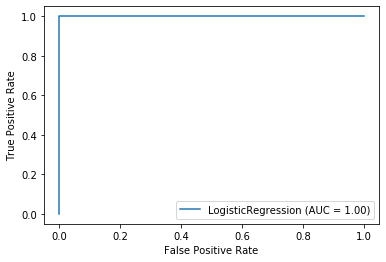

In [280]:
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(logmodel_balanced, X_test_balanced, y_test_balanced)  
plt.savefig('roc_balanced_model.png',bbox_inches='tight', dpi=200)
plt.show()

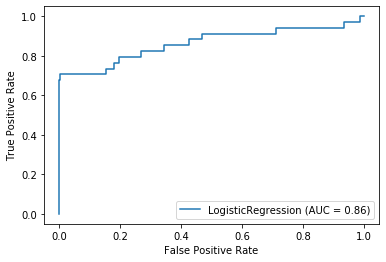

In [215]:
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(logmodel, X_test, y_test)  
plt.savefig('roc_unbalanced_model.png',bbox_inches='tight', dpi=200)
plt.show()

In [264]:
y_pred_prob_yes_sample=logmodel_balanced.predict_proba(X_test_balanced.iloc[10].values.reshape(1,-1))
y_pred2_sample=binarize(y_pred_prob_yes,8/10)[:,1]
print(y_pred_prob_yes_sample)

[[0. 1.]]


/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass threshold=0.8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [265]:
y_test_balanced.iloc[10]

1

In [286]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = \
                                            train_test_split(train_df_balanced.drop(['V21','Class'],axis=1), 
                                            train_df_balanced['Class'], 
                                            test_size=0.10, 
                                            random_state=2309)

from sklearn import preprocessing
X_without_time = X_train_balanced.drop('Time',axis=1).values
scaler = preprocessing.StandardScaler().fit(X_without_time)
X_without_time = scaler.transform(X_without_time)
X_time_only = np.expand_dims(X_train_balanced['Time'].values, axis=1)

X_train_scaled = np.concatenate([X_time_only,X_without_time],axis=1)

logmodel_balanced = LogisticRegression()
logmodel_balanced.fit(X_train_scaled,y_train_balanced)

predictions_balanced = logmodel_balanced.predict(X_test_balanced)

from sklearn.metrics import classification_report
print(classification_report(y_test_balanced,predictions_balanced))



              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.95      1.00      0.98        41

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



/Users/madhuaithal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


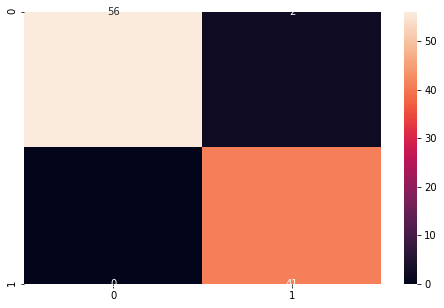

In [287]:
from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(y_test_balanced,predictions_balanced)
conf_matrix_df=pd.DataFrame(data=conf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d');

In [288]:
TN=conf_matrix[0,0]
TP=conf_matrix[1,1]
FN=conf_matrix[1,0]
FP=conf_matrix[0,1]

precision = TP/float(TP+FP)
recall=TP/float(TP+FN)
TNR=TN/float(TN+FP)
f1_score = 2*precision*recall/(precision+recall)

print("precision", precision)
print('recall', recall)
print('F1 score', f1_score)

precision 0.9534883720930233
recall 1.0
F1 score 0.9761904761904763


In [289]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =          ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                     ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =          ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =          ',TN/float(TN+FP),'\n',

'Precision (PPV) = TP/(TP+FP) =                            ',TP/float(TP+FP),'\n',

'Precision for negative class (NPV) = TN/(TN+FN) =         ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',recall/(1-TNR),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-recall)/TNR)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =           0.9797979797979798 
 The Missclassification = 1-Accuracy =                      0.02020202020202022 
 Sensitivity or True Positive Rate = TP/(TP+FN) =           1.0 
 Specificity or True Negative Rate = TN/(TN+FP) =           0.9655172413793104 
 Precision (PPV) = TP/(TP+FP) =                             0.9534883720930233 
 Precision for negative class (NPV) = TN/(TN+FN) =          1.0 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  29.000000000000036 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.0


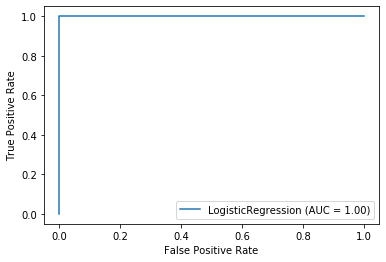

In [290]:
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(logmodel_balanced, X_test_balanced, y_test_balanced)  
plt.savefig('roc_balanced_model_wo_v21.png', bbox_inches='tight', dpi=200)
plt.show()

In [99]:
# all_columns = list(train_df_balanced.columns)
# print(all_columns[:-1])
# print(train_df_balanced.head())

In [101]:
# from pyspark import SparkContext, SparkConf
# from pyspark.sql import SparkSession
# from pyspark.sql.functions import desc

# spark = SparkSession \
#     .builder \
#     .appName("Lab4-Dataframe") \
#     .master("local[*]")\
#     .getOrCreate()

In [102]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('fraud-detection').master("local[*]").getOrCreate()

In [115]:
spark_df = spark.read.csv(os.path.join(DATASET_DIR, 'train.csv'), header = True, inferSchema = True)
# spark_df.show(1)
# spark_df.printSchema()
spark_df = spark_df.withColumnRenamed('Class', 'label')
# df.withColumnRenamed("dob","DateOfBirth")
# df = df.drop(['Unnamed: 0'])
# print(spark_df.count())


pos_spark_df = spark_df.filter(spark_df.label == 1)
neg_spark_df = spark_df.filter(spark_df.label == 0)
neg_spark_df_2 = neg_spark_df.limit(pos_spark_df.count())

spark_df_balanced = pos_spark_df.union(neg_spark_df)
print(spark_df_balanced.count())
# DATASET_DIR = '../kaggle-dataset'
# train_df = pd.read_csv(os.path.join(DATASET_DIR, 'train.csv'))
# train_df = train_df.drop(['Unnamed: 0'], axis=1)

# neg_df = train_df.loc[train_df['Class']==0]
# pos_df = train_df.loc[train_df['Class']==1]

256818


In [116]:
all_columns = spark_df_balanced.columns
print(all_columns)

['_c0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'label']


In [117]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

stages = []
all_input_cols = all_columns[:-1]
assembler = VectorAssembler(inputCols=all_inputs_cols, outputCol="features")
stages += [assembler]



In [118]:
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(spark_df_balanced)
spark_df_balanced_2 = pipelineModel.transform(spark_df_balanced)
selectedCols = ['label', 'features'] + all_input_cols
spark_df_balanced_2 = spark_df_balanced_2.select(selectedCols)
spark_df_balanced_2.printSchema()

root
 |-- label: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- _c0: integer (nullable = true)
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: doub

In [119]:
train, test = spark_df_balanced_2.randomSplit([0.9, 0.1], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))


Training Dataset Count: 231068
Test Dataset Count: 25750


In [120]:
from pyspark.ml.classification import LogisticRegression, LogisticRegressionModel

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

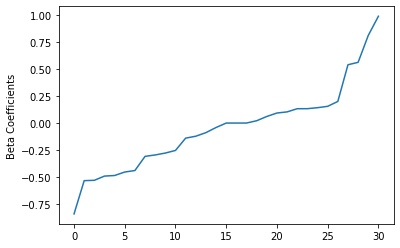

In [121]:
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

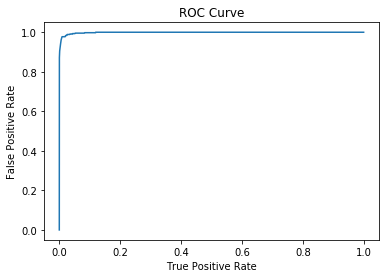

Training set areaUnderROC: 0.9985668446842483


In [122]:
trainingSummary = lrModel.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))


In [124]:
save_path = 'LR-balanced.model'
# lrModel.save(save_path)
lrModel.save("LRUnbalancedModel")


In [125]:
from pyspark.ml.classification import LogisticRegression, LogisticRegressionModel
# read pickled model via pipeline api
persistedModel = LogisticRegressionModel.load(save_path)

# predict
predictions = persistedModel.transform(test)
# predictions.select('Class').show(100)

In [126]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9999904712672977


In [127]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())

cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train)
predictions = cvModel.transform(test)
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9979402056141705
